In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
raw_data = pd.read_csv('diabetes2.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Preprocessing

In [5]:
print('Number of null values in each column')
print(raw_data.isnull().sum())


Number of null values in each column
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Random Forest algorithm

In [7]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()    

# function for random forest algorithm classifier

def rand_forest_classifier(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)

    m = RandomForestClassifier(n_jobs=-1)
    m.fit(X_train, y_train)

    predTree = m.predict(X_valid)
    print()
    print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    plot_confusion_matrix(m, X_valid, y_valid)
    plt.title('Confusion Matrix')
    plt.show()
    
    

Training data:  (615, 8) (615,)
Validation data:  (153, 8) (153,)

Training accuracy:  100.0 %

Validation accuracy:  79.74 %


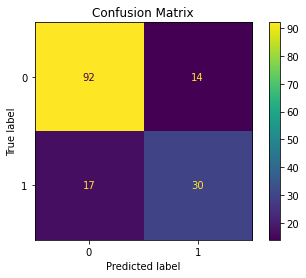

In [12]:
raw_data = shuffle(raw_data)
rand_forest_classifier(raw_data = raw_data,
                       validation_split = 0.2)

### Logistic Regression

In [13]:
def log_regression(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)


    model = LogisticRegression()
    model.fit(X_train, y_train)
    predTree = model.predict(X_valid)
    print('Training accuracy: ', round((model.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((model.score(X_valid, y_valid))*100,2),'%')   
    
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    
    plot_confusion_matrix(model, X_valid, y_valid)
    plt.title('Confusion Matrix')
    plt.show()

Training data:  (615, 8) (615,)
Validation data:  (153, 8) (153,)
Training accuracy:  78.7 %

Validation accuracy:  77.12 %


C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


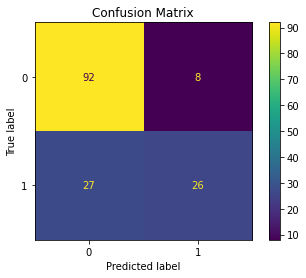

In [14]:
raw_data = shuffle(raw_data)
log_regression(raw_data = raw_data,
                       validation_split = 0.2)